In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

# Problem/Task
Transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

### Step 1: Read in the data

In [136]:
iris_data = datasets.load_iris()

#Create a dataframe for the X values
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [38]:
#Get labels, e.g. Y values
Y = iris_data.target
label_names = iris_data.target_names

#Check our X(df) and Y match
assert Y.shape[0] == df.shape[0]

### Step 2: Dimensionality Reduction

Our data has 4 features/dimensions, but we can only visualize data in 3 dimensions.<br>
One way to solve this is by using the Principal Component Analysis (PCA) algorithm.<br>
PCA looks to compuete new vectors that maximize the variance of the projected data. By using the first 3 components we then graph this in 3D while keeping as much variance as possible.<br>   

*Given a hint was to import the sklearn decomposition library it's a safe bet that this is the way they intended for us to do it.*

In [64]:
# quick note - the data all looks of similar magnitude so I don't think we will need to normalize it before running PCA
dimensions = 3

pca = decomposition.PCA(n_components=dimensions)
pca.fit(df)

#Create a new matrix, X, which will store the new z values (components) of for each of our samples
X = pca.transform(df)
print(f"Shape of df: {df.shape}")
print(f"Shape of X: {X.shape}\n")

for i,ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Component {i} explains {round(ratio * 100,2)}% of our datas variance.")

Shape of df: (150, 4)
Shape of X: (150, 3)

Component 0 explains 92.46% of our datas variance.
Component 1 explains 5.31% of our datas variance.
Component 2 explains 1.71% of our datas variance.


### Step 3: Visualizing the data
By colouring the different classes we can get a visual understanding of any differences between these classes.

<Figure size 432x288 with 0 Axes>

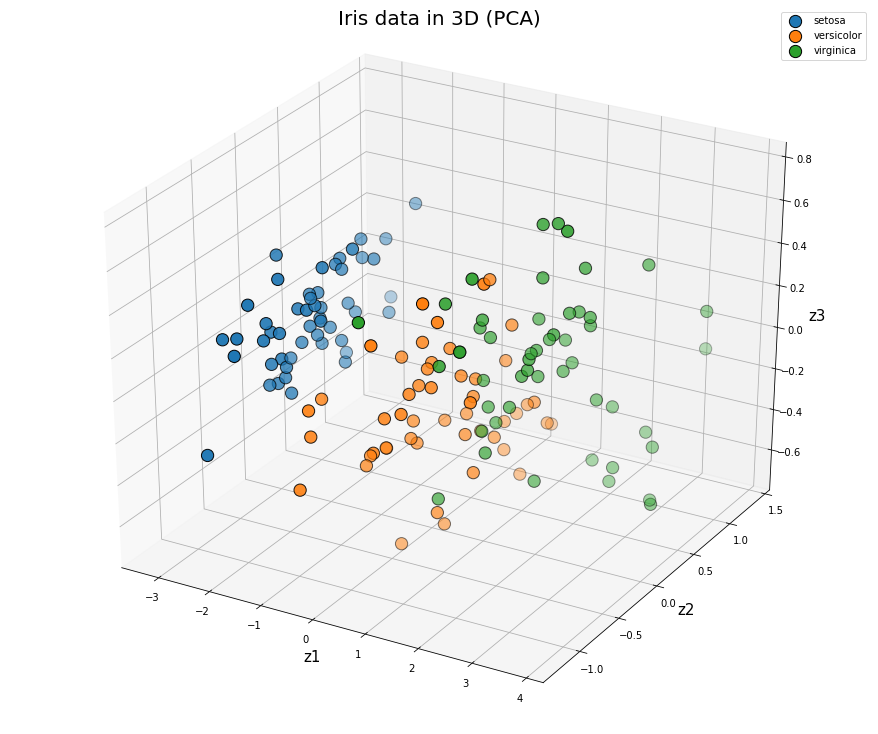

In [164]:
font_tile = {"fontsize": 20}
font_label = {"fontsize": 15}
title = "Iris data in 3D (PCA)"
axis_lab = [f"z{i+1}" for i in range(dimensions)]

font_tile = {"fontsize": 20}
font_label = {"fontsize": 15}

data_lab = pd.DataFrame(np.c_[X, Y], columns=axis_lab+["Y"])

plt.clf()
fig = plt.figure(figsize=(12, 10))
ax = Axes3D(fig)

for i,name in enumerate(label_names):
    d = data_lab.loc[data_lab.Y == i]
    ax.scatter(d.z1,d.z2,d.z3, s=150, edgecolor="black", label=name)
    

ax.set_title(title, pad=40, fontdict=font_tile)
ax.set_xlabel(axis_lab[0], fontdict=font_label)
ax.set_ylabel(axis_lab[1], fontdict=font_label)
ax.set_zlabel(axis_lab[2], fontdict=font_label)
plt.legend()

plt.show()

There seems to  be some differences between our 3 classes and so we should be able to decent results by running a classification algorithm using these 3 dimensions.<br>
However it is not a clear speration and so we should be wary of overfititng / high variance.